# Plotting Tools

In [ ]:
import os
import csv

import numpy as np
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt

### Basic plotting example

In [ ]:
log_dir = None          # Directory specified in script, not including date+time
min_num_trials = None   # Plots up to this many trials


returns = []
for subdir in os.listdir(log_dir):
    data = loadmat(os.path.join(log_dir, subdir, "logs.mat"))
    if data["returns"].shape[1] >= min_num_trials:
        returns.append(data["returns"][0][:min_num_trials])
        
returns = np.array(returns)
returns = np.maximum.accumulate(returns, axis=-1)
mean = np.mean(returns, axis=0)

# Plot result
plt.figure()
plt.plot(np.arange(1, min_num_trials + 1), mean)
plt.title("Performance")
plt.xlabel("Iteration number")
plt.ylabel("Return")
plt.show()

In [1]:
# standard imports
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
from os import read
import scipy.io as sio

In [2]:
# read the matlatb log file called logs.mat
def read_matlab_log(filename):
    logs = sio.loadmat(filename)
    return logs

#logs = read_matlab_log('./log/2023-06-18--20:08:53/logs.mat')
logs = read_matlab_log('./log/2023-06-19--08:20:35/logs.mat')
logs

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Mon Jun 19 08:32:27 2023',
 '__version__': '1.0',
 '__globals__': [],
 'observations': array([[array([[ 0.03538689, -0.07907877, -0.0280296 , -0.13505448],
                [ 0.01413266, -0.038715  , -1.03204558,  2.12972872],
                [-0.02309782,  0.03410954, -0.83179584,  1.5348285 ],
                [-0.05198952,  0.08433275, -0.61484741,  0.99516219],
                [-0.08132155,  0.13573597, -0.85146271,  1.5754616 ],
                [-0.0975749 ,  0.1584106 ,  0.03432783, -0.40505819],
                [-0.11397016,  0.18663922, -0.85002679,  1.78586604],
                [-0.15096755,  0.26652594, -0.99979228,  2.21477727]]),
         array([[ 0.0867842 , -0.05479499,  0.12399495, -0.23135459],
                [ 0.09302744, -0.06778943,  0.18811389, -0.41822263],
                [ 0.10197742, -0.08863323,  0.25944356, -0.62506439],
                [ 0.11571069, -0.12241318,  0.42702665, -1.06373602],
      

In [3]:
logs.keys()

dict_keys(['__header__', '__version__', '__globals__', 'observations', 'actions', 'returns', 'rewards'])

In [4]:
# get observation, action, retunrns as rewards data
obs = logs['observations']
act = logs['actions']
ret = logs['returns']
rew = logs['rewards']

In [7]:
ret.shape

(1, 426)

In [8]:
ret[0]

array([ 5., 15.,  5., 12.,  4.,  6., 16.,  4.,  7., 10., 15.,  4.,  6.,
       37.,  9., 24., 19.,  1., 52., 29., 13., 14., 22., 14.,  4.,  4.,
        6.,  1., 30.,  7.,  3.,  5.,  5.,  3.,  4.,  2.,  3.,  4.,  4.,
        3.,  3.,  5.,  5.,  4.,  4.,  4.,  4.,  4.,  3.,  4.,  4.,  4.,
        4.,  3.,  4.,  4.,  5.,  5.,  3.,  4.,  4.,  4.,  4.,  1.,  3.,
        4.,  4.,  3.,  4.,  4.,  1.,  3.,  5.,  2.,  2.,  3.,  4.,  3.,
        3.,  3.,  4.,  4.,  3.,  3.,  3.,  3.,  4.,  3.,  3.,  1.,  3.,
        1.,  4.,  4.,  2.,  2.,  3.,  4.,  4.,  3.,  2.,  1.,  3.,  3.,
        3.,  2.,  3.,  4.,  3.,  3.,  3.,  3.,  4.,  6.,  4.,  4.,  4.,
        4.,  3.,  1.,  3.,  3.,  4.,  3.,  3.,  3.,  3.,  2.,  5., 14.,
        3.,  3.,  3.,  4.,  1.,  4.,  4.,  4.,  2.,  3.,  1.,  5.,  3.,
        2.,  3.,  3.,  3.,  3.,  2.,  3.,  2.,  1.,  2.,  3.,  1.,  4.,
        3.,  3.,  4.,  4.,  3.,  3.,  6.,  3.,  4.,  3.,  5.,  5.,  4.,
        1.,  4.,  2.,  1.,  3.,  4.,  3.,  2.,  4.,  2.,  3.,  3

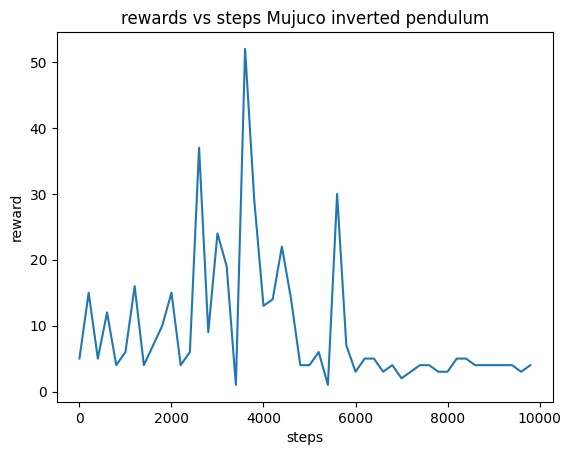

In [12]:
# create a list 0 to 49 * 200
# 200 is the number of steps in each episode
# 50 is the number of episodes
# 50 * 200 = 10000
# 10000 is the total number of steps in all episodes

steps = [i*200 for i in range(50)]

# plot returns vs steps
plt.plot(steps, ret[0][:50])
plt.xlabel('steps')
plt.ylabel('reward')
plt.title('rewards vs steps Mujuco inverted pendulum')
plt.show()